# Moment Forecasting Example

## Loading Moment Model

In [1]:
import os 
import sys
import torch
import numpy as np

src_path = os.path.abspath(os.path.join("..", "src"))
if src_path not in sys.path:
    sys.path.insert(0, src_path)

from tsfmproject.model import MomentModel
from tsfmproject.dataset import MomentDataset
from tsfmproject.utils import load_args

arg_path = "../config/moment_forecast.json"
args = load_args(arg_path)
mmt = MomentModel(**args)

Loading MOMENT model from AutonLab/MOMENT-1-large


## Finetune Moment Model on the ETT dataset

In [2]:
train_dataset = MomentDataset(name="ett", datetime_col='date', path='../src/tsfmproject/models/moment/data/ETTh1.csv', 
                              mode='train', horizon=192)

val_dataset = MomentDataset(name="ett", datetime_col='date', path='../src/tsfmproject/models/moment/data/ETTh1.csv',
                            mode='test', horizon=192)
# path = '../src/tsfmproject/models/moment/data/ETTh1.csv'

# dataset = MomentDataset(name="ett", datetime_col='date', path=path, 
#                               mode='train', horizon=192)

finetuned_model = mmt.finetune(train_dataset, task_name="forecasting")
mmt.evaluate(val_dataset, task_name="forecasting")


/nethome/sli999/anaconda3/envs/torch/lib/python3.11/site-packages/torch/utils/checkpoint.py:87: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


Epoch 0: Train loss: 0.618
Epoch 1: Train loss: 0.540
Epoch 2: Train loss: 0.518
Epoch 3: Train loss: 0.506
Epoch 4: Train loss: 0.499


{'mse': 0.5154043,
 'mae': 0.518449,
 'mase': 0.8582568,
 'mape': -0.042493932,
 'rmse': 0.7179166,
 'nrmse': 0.08125825943422521,
 'smape': 0.87836075,
 'msis': 0.08535303,
 'nd': -22.15933257687958}

## Test the Finetuned Model

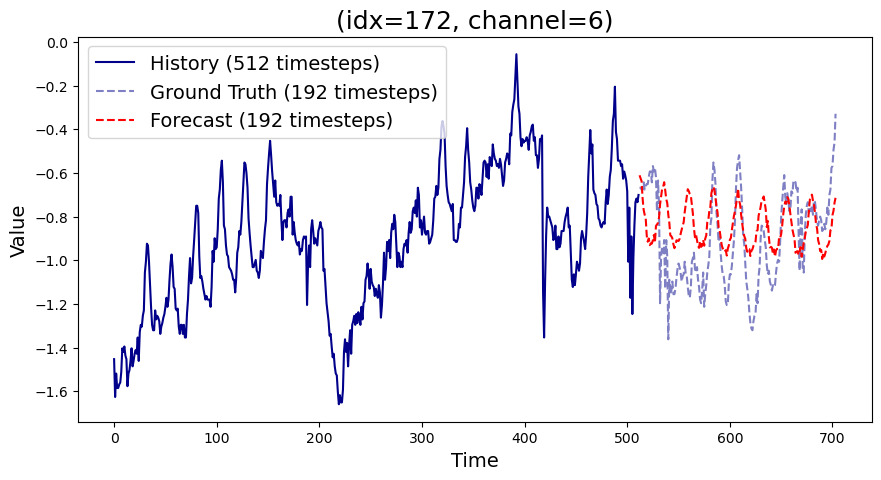

In [3]:
# avg_loss, trues, preds, histories = mmt.evaluate(val_dataset, task_name='forecasting')
# print("Validation loss:", avg_loss)
mmt.plot(val_dataset, task_name='forecasting')

## Visualization of the evaluation

In [4]:
# import matplotlib.pyplot as plt

# # Pick a random channel and time index
# trues = np.array(trues)
# preds = np.array(preds)
# histories = np.array(histories)
# channel_idx = np.random.randint(0, 7) 
# time_index = np.random.randint(0, trues.shape[0]) 

# history = histories[time_index, channel_idx, :] 
# true = trues[time_index, channel_idx, :]
# pred = preds[time_index, channel_idx, :]

# plt.figure(figsize=(12, 4))

# # Plotting the first time series from history
# plt.plot(range(len(history)), history, label='History (512 timesteps)', c='darkblue')

# # Plotting ground truth and prediction
# num_forecasts = len(true)

# offset = len(history)
# plt.plot(range(offset, offset + len(true)), true, label='Ground Truth (192 timesteps)', color='darkblue', linestyle='--', alpha=0.5)
# plt.plot(range(offset, offset + len(pred)), pred, label='Forecast (192 timesteps)', color='red', linestyle='--')

# plt.title(f"ETTh1 (Hourly) -- (idx={time_index}, channel={channel_idx})", fontsize=18)
# plt.xlabel('Time', fontsize=14)
# plt.ylabel('Value', fontsize=14)
# plt.legend(fontsize=14)
# plt.show()